# Plotly

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline 

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline()

In [13]:
arr = np.random.randn(50, 4)
df = pd.DataFrame(arr, columns=['A', 'B', 'C', 'D'])

In [14]:
df.head()

,A,B,C,D
0,-1.030727,0.078450,-0.593362,0.448925
1,0.051324,-1.075556,2.586216,1.230005
2,-2.262568,-0.204639,0.847247,0.394310
3,-0.754579,-0.737325,-0.284802,-0.876914
4,1.314505,1.515799,-0.450296,-0.647359


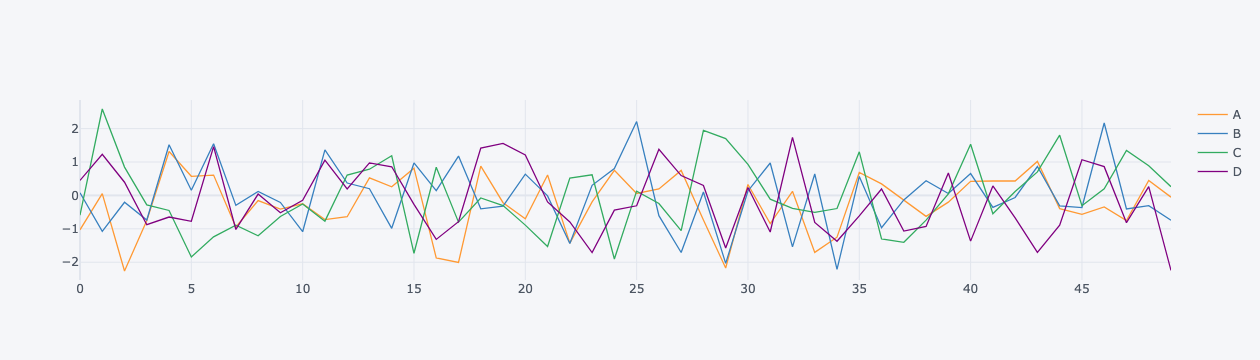

In [17]:
df.iplot()

In [19]:
import plotly.graph_objects as go

df_stock = px.data.stocks()
df_stock.head()    # 01/01/2018 -> 30/12/2019  (2 years)

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


## Plot Graph

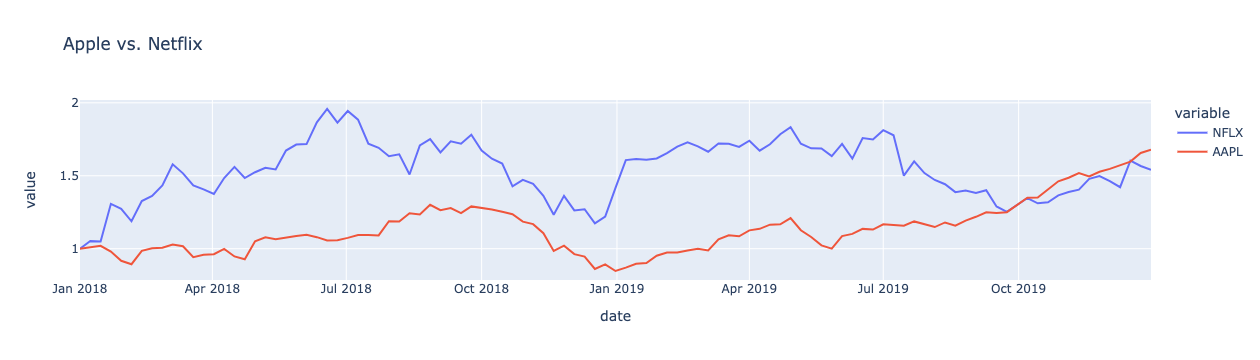

In [22]:
px.line(data_frame = df_stock, x = 'date', y = ['NFLX', 'AAPL'], 
        labels = {'x' : 'Date', 'y' : 'Price'}, 
        title='Apple vs. Netflix')

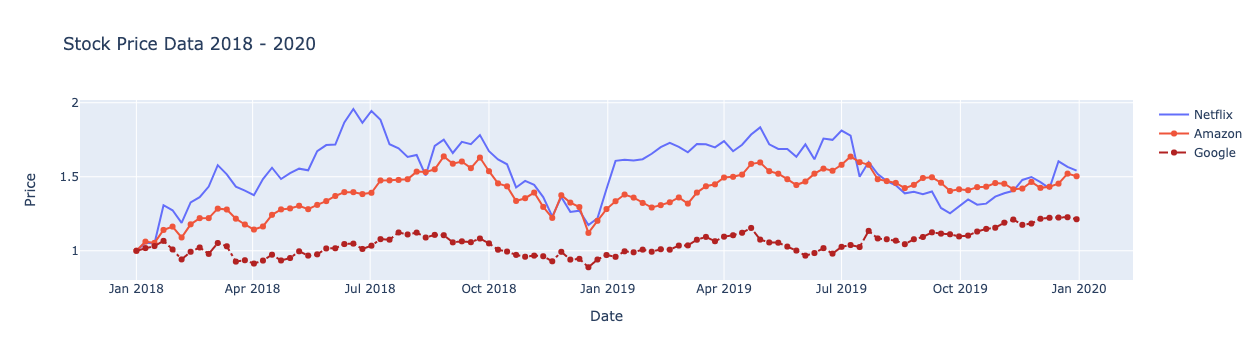

In [33]:
fig = go.Figure()
fig.update_layout(title = 'Stock Price Data 2018 - 2020', xaxis_title = 'Date', yaxis_title = 'Price')
fig.add_trace(go.Scatter(x = df_stock.date, 
                         y = df_stock.NFLX, 
                         mode = 'lines',
                          name = 'Netflix'))

fig.add_trace(go.Scatter(x = df_stock.date, 
                         y = df_stock.AMZN, 
                         mode = 'lines + markers',
                          name = 'Amazon'))

fig.add_trace(go.Scatter(x = df_stock.date, 
                         y = df_stock.GOOG, 
                         mode = 'lines + markers',
                         name = 'Google',
                         line = dict(color = 'firebrick', width = 2,  dash = 'dashdot')))

## Graph Bar

In [49]:
df_us = px.data.gapminder()

In [50]:
df_us.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [54]:
df_us = df_us.query("country == 'United States' ")
df_us.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1608,United States,Americas,1952,68.44,157553000,13990.48208,USA,840
1609,United States,Americas,1957,69.49,171984000,14847.12712,USA,840
1610,United States,Americas,1962,70.21,186538000,16173.14586,USA,840
1611,United States,Americas,1967,70.76,198712000,19530.36557,USA,840
1612,United States,Americas,1972,71.34,209896000,21806.03594,USA,840


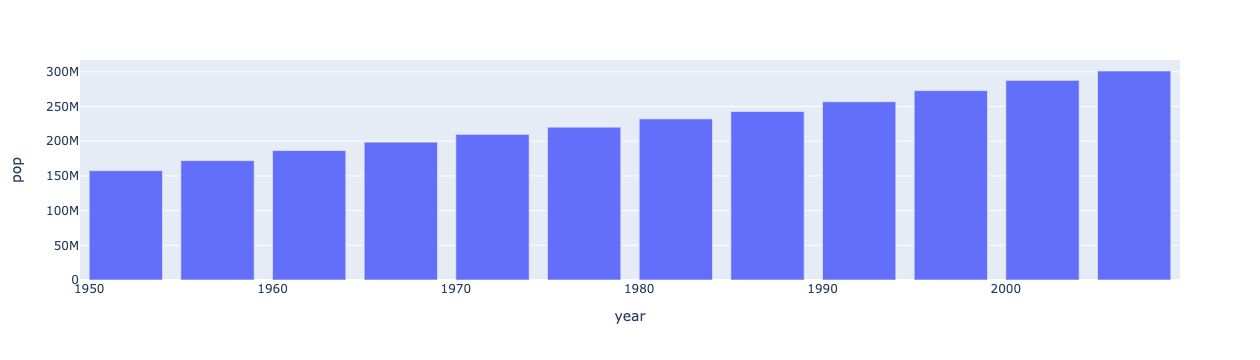

In [55]:
px.bar(data_frame=df_us, x = 'year', y = 'pop')

In [57]:
df_tips = px.data.tips()
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


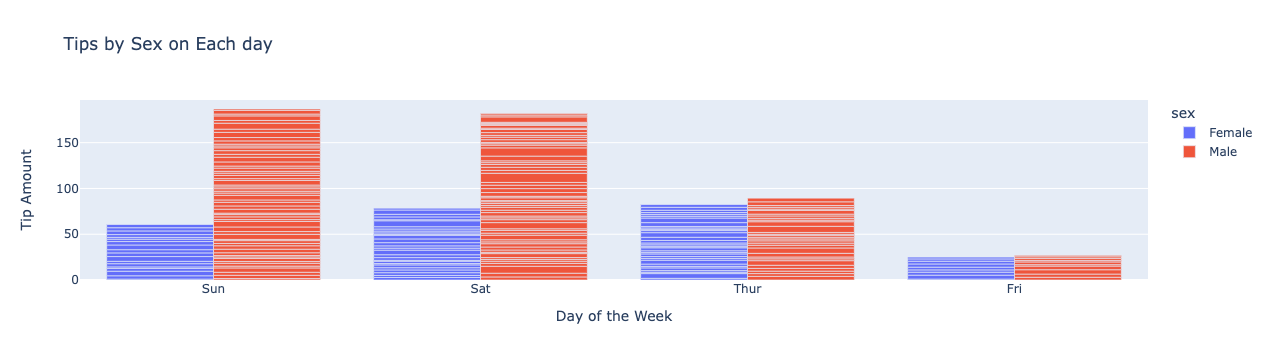

In [66]:
px.bar(df_tips, x = 'day', y = 'tip', color = 'sex', 
       title = 'Tips by Sex on Each day',
       barmode = 'group',    # separer les sex en deux parties. 
       labels= {'tip' : 'Tip Amount', 'day' : 'Day of the Week' })

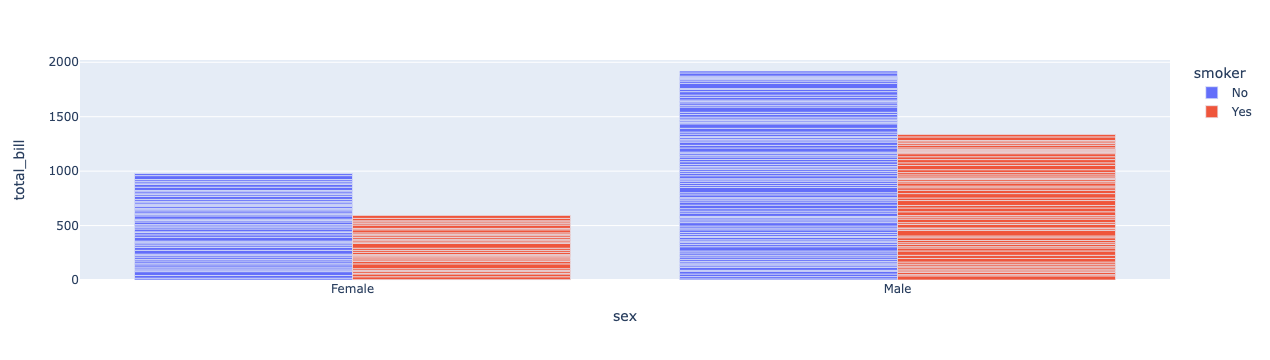

In [65]:
px.bar(df_tips, x = 'sex', y = 'total_bill', color = 'smoker', barmode = 'group')